In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(n1,n2,n3,n4,n5,n6):
    b = n1+n3+2*n4; c = n2+n3+2*n5
    if b +c == 0:
        return 0
    else:
        return (b-c)**2/(b+c)

In [3]:
def generateData(n):
    table = np.zeros(6)
    table[0] = np.random.binomial(n,1/6)
    table[1] = np.random.binomial(n-table[0],1/5)
    table[2] = np.random.binomial(n-table[0]-table[1],1/4)
    table[3] = np.random.binomial(n-table[0]-table[1]-table[2],1/3)
    table[4] = np.random.binomial(n-table[0]-table[1]-table[2]-table[3],1/2)
    table[5] = n-table[0]-table[1]-table[2]-table[3]-table[4]
    return table

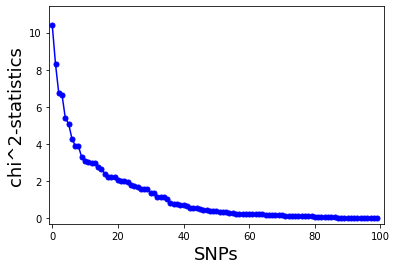

In [4]:
n = 2000; m = 100
stats = np.zeros(m)

for i in range(m):
    table = generateData(n)
    stats[i] = TDT(table[0],table[1],table[2],table[3],table[4],table[5])

sstats = sorted(stats, reverse=True)

index = np.zeros(m)
for i in range(m):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.3, np.max(sstats)+1)
plt.xlim(-1, 101)
plt.plot(index, sstats, marker="o", markersize=5, color = "blue", linestyle = "-")
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("chi^2-statistics", fontsize = 18)
fig.savefig("statsDistribution_TDT_N=2000.png")
fig.savefig("figs/statsDistribution_TDT_N=2000.eps", bbox_inches="tight", pad_inches=0.05)